# Car

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [13]:
df = pd.read_csv("used cars regression.csv")
df.shape

(6019, 14)

In [14]:
df.drop('New_Price',axis=1,inplace=True)
df.drop('Unnamed: 0',axis = 1,inplace = True)


In [15]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [16]:
nulls = df.isnull().sum() 
nulls

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [18]:
df['Transmission'] = df['Transmission'].map({'Manual':1, 'Automatic':0})
df['Owner_Type'] = df['Owner_Type'].map({'First':1, 'Second':2,'Third':3, 'Fourth & Above':4})
df['Fuel_Type'] = df['Fuel_Type'].map({'Diesel':1, 'Electric':2,'CNG':3, 'LPG':4,'Petrol':5})
df['Location'] = df['Location'].map({'Mumbai':1, 'Pune':2,'Chennai':3, 'Coimbatore':4,'Hyderabad':5,
                                   'Jaipur':6, 'Kochi':7,'Kolkata':8, 'Bangalore':9,'Ahmedabad':10,'Delhi':11 })

In [19]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'km/kg' in x:
        if len(x) > 1:
            return float(x.replace('km/kg', '')) * 1.40
        return 1.0
    if 'kmpl' in x:
        if len(x) > 1:
            return float(x.replace('kmpl', '')) * 1
        return 1.0


df['Mileage'] = df['Mileage'].apply(value_to_float)

In [20]:
df['Power']=df['Power'].str.replace('bhp','')


In [21]:
df['Power']=df['Power'].str.replace('null','')


In [22]:
df['Power'] = df['Power'].transform(lambda x: x.fillna(0))


In [23]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if '' in x:
        if len(x) > 1:
            return float(x.replace('', '')) * 1.0
        return 1.0



df['Power'] = df['Power'].apply(value_to_float)

In [24]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'CC' in x:
        if len(x) > 1:
            return float(x.replace('CC', '')) * 1.0
        return 1.0


df['Engine'] = df['Engine'].apply(value_to_float)

In [25]:
df['Mileage'] = df['Mileage'].transform(lambda x: x.fillna(x.mean()))
df['Engine'] = df['Engine'].transform(lambda x: x.fillna(x.mean()))
df['Seats'] = df['Seats'].transform(lambda x: x.fillna(x.mean()))

In [26]:
df.Location.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8, 11,  9, 10], dtype=int64)

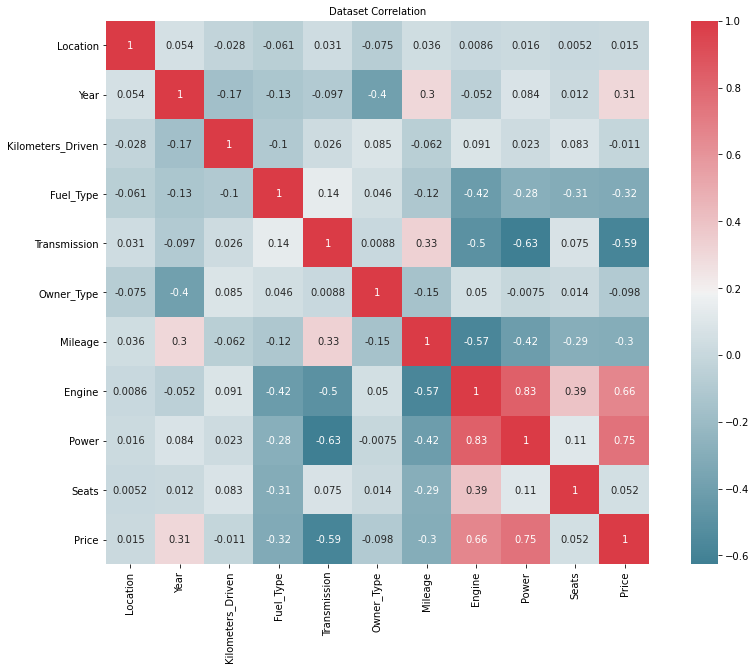

In [27]:
def heat_map_plot(df):
    f, ax = plt.subplots(figsize=(15, 10))
    corr = df.corr()
    mp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),\
                     cmap=sns.diverging_palette(220, 10, as_cmap=True),
                     square=True, ax=ax, annot = True)
    mp.set_title(label='Dataset Correlation', fontsize=10)

heat_map_plot(df)


In [28]:
df.loc[:, df.dtypes != np.object].corr()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
Location,1.000000,0.053828,-0.028418,-0.061387,0.031106,-0.075025,0.035690,0.008570,0.016432,0.005209,0.014887
Year,0.053828,1.000000,-0.173048,-0.128179,-0.097059,-0.397152,0.303757,-0.051712,0.084284,0.012204,0.305327
Kilometers_Driven,-0.028418,-0.173048,1.000000,-0.104700,0.025663,0.085337,-0.061866,0.091029,0.022821,0.083072,-0.011493
Fuel_Type,-0.061387,-0.128179,-0.104700,1.000000,0.136826,0.045635,-0.118089,-0.419705,-0.283987,-0.306197,-0.317272
Transmission,0.031106,-0.097059,0.025663,0.136826,1.000000,0.008797,0.326723,-0.499082,-0.626476,0.075250,-0.586025
Owner_Type,-0.075025,-0.397152,0.085337,0.045635,0.008797,1.000000,-0.151957,0.050454,-0.007516,0.013912,-0.097557
Mileage,0.035690,0.303757,-0.061866,-0.118089,0.326723,-0.151957,1.000000,-0.573496,-0.416491,-0.293045,-0.300067
Engine,0.008570,-0.051712,0.091029,-0.419705,-0.499082,0.050454,-0.573496,1.000000,0.831394,0.393087,0.657118
Power,0.016432,0.084284,0.022821,-0.283987,-0.626476,-0.007516,-0.416491,0.831394,1.000000,0.107261,0.752028
Seats,0.005209,0.012204,0.083072,-0.306197,0.075250,0.013912,-0.293045,0.393087,0.107261,1.000000,0.052118


In [29]:
df.drop(['Fuel_Type','Transmission','Kilometers_Driven','Owner_Type','Name'],axis=1,inplace=True)

# Model

In [30]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [32]:
X_train = df.drop(columns=['Price'])
y_train = df['Price']

X_val = df.drop(columns=['Price'])
y_val = df['Price']

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

pipe = Pipeline([('scaler', StandardScaler()), 
                 ("Regressor",DecisionTreeRegressor(max_depth=8, random_state=0))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Regressor',
                 DecisionTreeRegressor(max_depth=8, random_state=0))])

In [34]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [35]:
print("The accuracy of the classifier on the dataset is ", (regressor.score(X_val, y_val)))

The accuracy of the classifier on the dataset is  0.998300062299783


In [36]:
print("The accuracy of the classifier on the dataset is ", (pipe.score(X_val, y_val)))

The accuracy of the classifier on the dataset is  0.9404482854440678
